# Problem set 1

# TODO !!
In exercise 1, make the plot easy to read. 

In exercise 2, make sure the conference colors are the same. 


Stupid ideas:
Make the plots with images related to the variables. 

# Exercise 1

In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})

# Scraping data and parsing through site
First i tried standard datascraping, but the website would not give me permission to do this. So instead i stole the html code through chrome.

I made a function called "search_string", which locates desired values, based on which string comes right before. I gather it all in a pandas dataframe

In [118]:
%time
#open "table html.txt" file
with open("table html 2014.txt", "r") as file:
    data = file.read()

def search_string(data, trigger_string, end_string, search_length, N = 351):
    current_string = data
    """
    For seaching a string in a text file. 
    trigger_string: the string before start of the value to search
    end_string: the string at the end of the value to search
    search_length: the approximate length of the value to search
    """
    output = []
    for x in range(N):
        trigger_indx = current_string.index(trigger_string)
        interval = current_string[trigger_indx + len(trigger_string) : trigger_indx + len(trigger_string) + search_length]
        end_indx = interval.index(end_string)
        value = interval[:end_indx]
        current_string = current_string[trigger_indx + len(value):]
        output.append(value)

    return output

#search for the certain values
city_names = search_string(data, "team=", "&", 30)
conf = search_string(data, "conf.php?c=", "&", 10)
win_lose = search_string(data, 'class="wl">', "<", 10)
win = []
lose = []
for x in win_lose:
    result = x.split("-")
    win.append(result[0])
    lose.append(result[1])
netrtg = search_string(data, "</td><td>", "<", 10)


ortg_adjt_luck_netrtg_ncsos = search_string(data, 'class="td-left divide">', "<", 10, N = 5*351)
ortg = ortg_adjt_luck_netrtg_ncsos[0::5]
adjt = ortg_adjt_luck_netrtg_ncsos[1::5]
luck = ortg_adjt_luck_netrtg_ncsos[2::5]
strength_netrtg = ortg_adjt_luck_netrtg_ncsos[3::5]
ncsos = ortg_adjt_luck_netrtg_ncsos[4::5]

drtg_ortg_drtg = search_string(data, '</span></td><td class="td-left">', "<", 10, N = 3*351)
drtg = drtg_ortg_drtg[0::3]
strength_ortg = drtg_ortg_drtg[1::3]
strength_drtg = drtg_ortg_drtg[2::3]

# Create a DataFrame with the values
df = pd.DataFrame(city_names, columns=['City'])
df['Conference'] = conf
df['Win'] = win
df['Lose'] = lose
df['NetRTG'] = netrtg
df['ORTG'] = ortg
df['DRTG'] = drtg
df['ADJT'] = adjt
df['Luck'] = luck
df['Strength NetRTG'] = strength_netrtg
df['Strength ORTG'] = strength_ortg
df['Strength DRTG'] = strength_drtg
df['NCSOS'] = ncsos




# Display the DataFrame
#print(df)

# Plot the dataframe
fig, ax = plt.subplots(figsize=(15, 8))  # Set the figure size
ax.axis('tight')
ax.axis('off')
table = ax.table(cellText=df.values, colLabels=df.columns, cellLoc='center', loc='center')
plt.close()

CPU times: total: 0 ns
Wall time: 6.2 μs


[ 87  91  95  99 103 107 111 115]



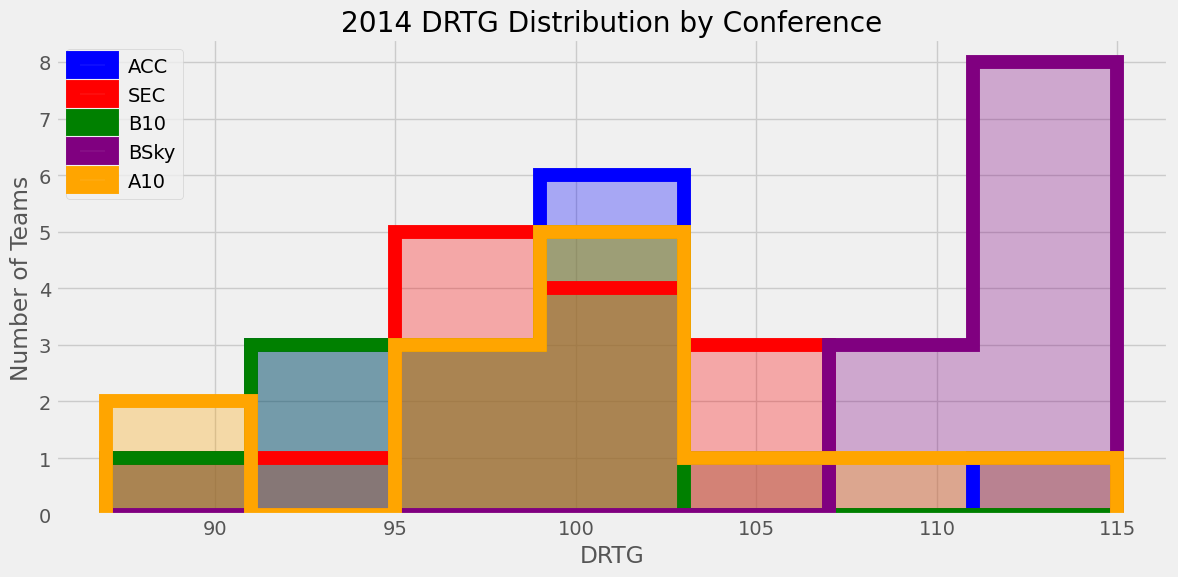

In [119]:
# Convert to numpy array, and divide the data by conference
data_numpy = df.to_numpy()

ACC = data_numpy[data_numpy[:,1] == "ACC"]
SEC = data_numpy[data_numpy[:,1] == "SEC"]
B10 = data_numpy[data_numpy[:,1] == "B10"]
BSky = data_numpy[data_numpy[:,1] == "BSky"]
A10 = data_numpy[data_numpy[:,1] == "A10"]
all_conferences = [ACC, SEC, B10, BSky, A10]
plt.style.use('fivethirtyeight')

bins_width = 4
bin_edges = np.arange(87, 117, bins_width)
print(bin_edges)
alpha_val = 0.3
histtype = "stepfilled"
fig, ax = plt.subplots(figsize=(12, 6))  # Set the figure size
colors = ['blue', 'red', 'green', 'purple', 'orange']

for i in range(len(all_conferences[:5])):
    plt.hist(all_conferences[i][:,6].astype(float), bins=bin_edges,  histtype = histtype, color = colors[i], rwidth = 0.1, alpha=alpha_val, linewidth=1)
    plt.hist(all_conferences[i][:,6].astype(float), bins=bin_edges,  histtype = "step", color = colors[i], rwidth = 0.1, alpha=1, linewidth=10, label = all_conferences[i][0,1])

plt.legend()
plt.title('2014 DRTG Distribution by Conference')
plt.xlabel('DRTG')
plt.ylabel('Number of Teams')
plt.savefig('2014 DRTG Distribution by Conference.png')

print("")
data_numpy_2014 = data_numpy

# Part 2. Comparing 2009 and 2014

## Rewriting scraping code into a function, and loading 2009 data

NJIT


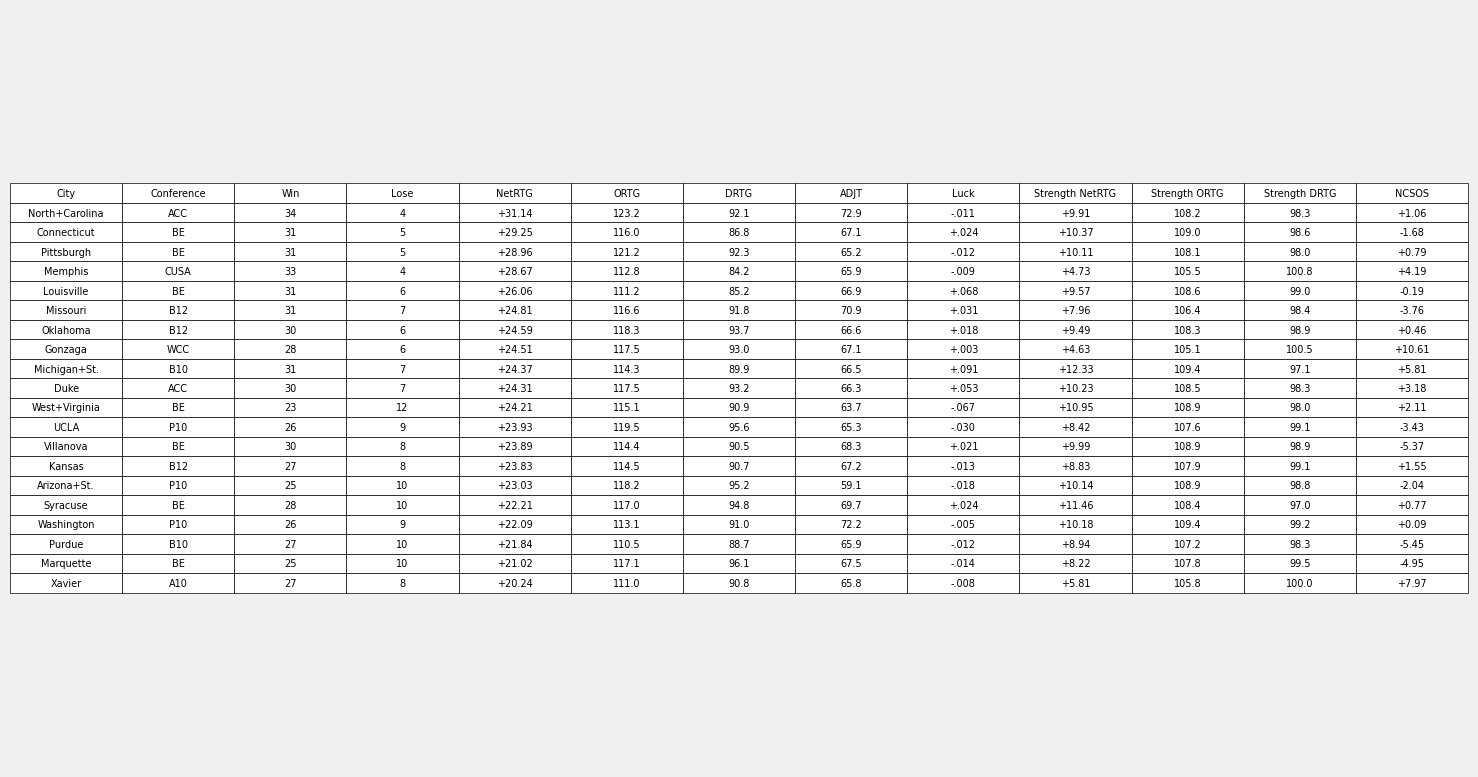

In [120]:
#open "table html.txt" file
def scrape(html, show_table = False, show_length = 20):
    with open(html, "r") as file:
        data = file.read()

    def search_string(data, trigger_string, end_string, search_length, N = 344):
        current_string = data
        """
        For seaching a string in a text file. 
        trigger_string: the string before start of the value to search
        end_string: the string at the end of the value to search
        search_length: the approximate length of the value to search
        """
        output = []
        for x in range(N):
            trigger_indx = current_string.index(trigger_string)
            interval = current_string[trigger_indx + len(trigger_string) : trigger_indx + len(trigger_string) + search_length]
            end_indx = interval.index(end_string)
            value = interval[:end_indx]
            current_string = current_string[trigger_indx + len(value):]
            output.append(value)

        return output


    #search for the certain values
    city_names = search_string(data, "team=", "&", 30)
    print(city_names[-1])
    conf = search_string(data, "conf.php?c=", "&", 10)
    win_lose = search_string(data, 'class="wl">', "<", 10)
    win = []
    lose = []
    for x in win_lose:
        result = x.split("-")
        win.append(result[0])
        lose.append(result[1])
    netrtg = search_string(data, "</td><td>", "<", 10)


    ortg_adjt_luck_netrtg_ncsos = search_string(data, 'class="td-left divide">', "<", 20, N = 5*344)
    ortg = ortg_adjt_luck_netrtg_ncsos[0::5]
    adjt = ortg_adjt_luck_netrtg_ncsos[1::5]
    luck = ortg_adjt_luck_netrtg_ncsos[2::5]
    strength_netrtg = ortg_adjt_luck_netrtg_ncsos[3::5]
    ncsos = ortg_adjt_luck_netrtg_ncsos[4::5]

    drtg_ortg_drtg = search_string(data, '</span></td><td class="td-left">', "<", 20, N = 3*344)
    drtg = drtg_ortg_drtg[0::3]
    strength_ortg = drtg_ortg_drtg[1::3]
    strength_drtg = drtg_ortg_drtg[2::3]

    # Create a DataFrame with the values
    df = pd.DataFrame(city_names, columns=['City'])
    df['Conference'] = conf
    df['Win'] = win
    df['Lose'] = lose
    df['NetRTG'] = netrtg
    df['ORTG'] = ortg
    df['DRTG'] = drtg
    df['ADJT'] = adjt
    df['Luck'] = luck
    df['Strength NetRTG'] = strength_netrtg
    df['Strength ORTG'] = strength_ortg
    df['Strength DRTG'] = strength_drtg
    df['NCSOS'] = ncsos


    if show_table:
        fig, ax = plt.subplots(figsize=(15, 8))  # Set the figure size
        ax.axis('tight')
        ax.axis('off')
        table = ax.table(cellText=df.values[:show_length], colLabels=df.columns, cellLoc='center', loc='center')

    return df

df = scrape("table html 2009.txt", show_table = True, show_length = 20)
data_numpy_2009 = df.to_numpy()

# Comparing 2014 and 2009

Text(0, 0.5, 'DRTG 2014')

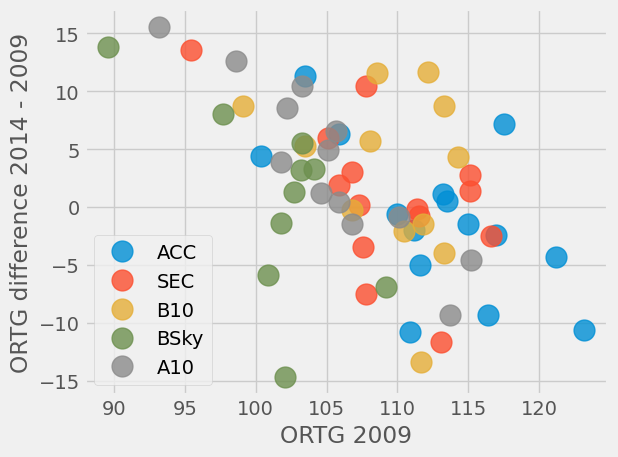

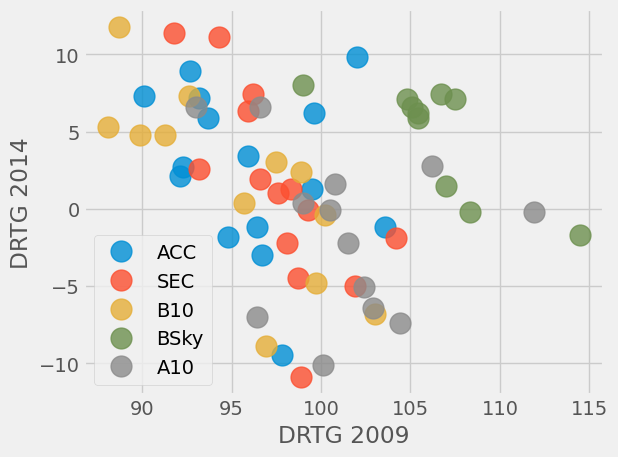

In [138]:
def sort_conference(data):
    """ 
    Function to sort the data by conference
    """
    ACC = data[data[:,1] == "ACC"]
    SEC = data[data[:,1] == "SEC"]
    B10 = data[data[:,1] == "B10"]
    BSky = data[data[:,1] == "BSky"]
    A10 = data[data[:,1] == "A10"]
    all_conferences = [ACC, SEC, B10, BSky, A10]
    return all_conferences

conferences_2014 = sort_conference(data_numpy_2014)
ACC_2014 = conferences_2014[0]


def find_value(team_name, other_data, value_index):
    """
    Function to find the corresponding variable value for a specific team in another dataset
    """
    for team_variables in other_data:
        name = team_variables[0]
        if name == team_name:
            return team_variables[value_index]
        
def compare_values(data_original, data_compare, value_index):
    """
    Function to compare the values of teams in two datasets
    """
    output = []
    for team_variables in data_original:
        name = team_variables[0]
        if name in data_compare[:,0]:
            indx = np.where(data_compare[:,0] == name)[0][0]
            value_2009 = data_compare[indx, value_index]
            value_2014 = team_variables[value_index]
            difference = float(value_2014) - float(value_2009)
            output.append([name, float(value_2014), float(value_2009), difference])

    return output


for conference in conferences_2014:
    result = np.array(compare_values(conference, data_numpy_2009, 5), dtype = object).T
    plt.plot(result[2], result[3], 'o', markersize = 15, alpha = 0.8,  label = conference[0,1])

plt.legend()
plt.xlabel('ORTG 2009')
plt.ylabel('ORTG difference 2014 - 2009')

plt.figure()
for conference in conferences_2014:
    result = np.array(compare_values(conference, data_numpy_2009, 6), dtype = object).T
    plt.plot(result[2], result[3], 'o', markersize = 15, alpha = 0.8,  label = conference[0,1])

plt.legend()
plt.xlabel('DRTG 2009')
plt.ylabel('DRTG 2014')


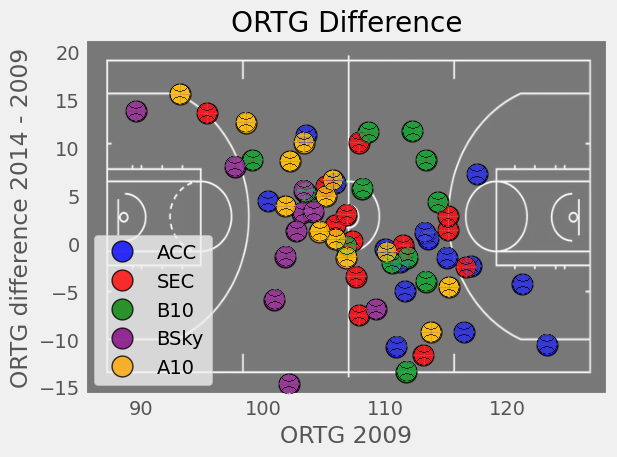

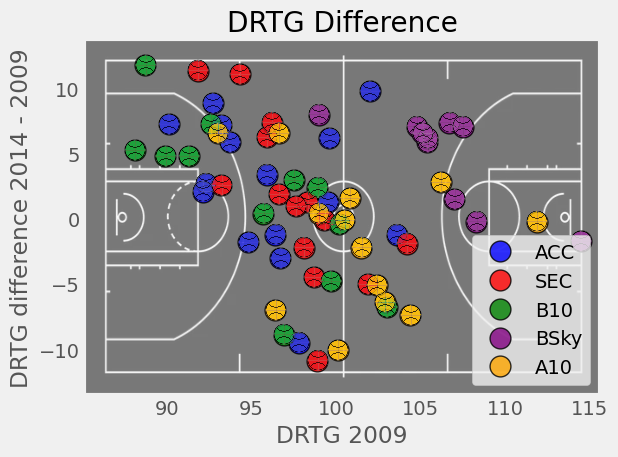

In [148]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import numpy as np

colors = ['blue', 'red', 'green', 'purple', 'orange']
mean_ORTG_difference = []
mean_DRTG_difference = []
med_ORTG_difference = []
med_DRTG_difference = []

# Load the background image
img = mpimg.imread('Basketball.png')
marker_images = [mpimg.imread('ball ' + color + '.png') for color in colors]

#marker_img = mpimg.imread('ball green.png')  # Load the marker image

def add_marker(ax, x, y, image):
    im = OffsetImage(image, zoom=0.03, alpha=0.7)  # Adjust zoom and alpha to fit your needs
    ab = AnnotationBbox(im, (x, y), frameon=False)
    ax.add_artist(ab)

# Plot with background image for ORTG
fig, ax = plt.subplots()
#ax.imshow(img, extent=[result[2].min()-10, result[2].max()+15, result[3].min()-5, result[3].max()+10], aspect='auto', alpha=0.5)
plt.title('ORTG Difference')
i = 0
for conference in conferences_2014:
    result = np.array(compare_values(conference, data_numpy_2009, 5), dtype=object).T
    if i == 0:
        ax.imshow(img, extent=[result[2].min()-15, result[2].max()+5, result[3].min()-5, result[3].max()+10], aspect='auto', alpha=0.5)
    plt.plot(result[2], result[3], 'o', markersize=15, alpha=0.8, label=conference[0,1], color=colors[i], markeredgecolor='black')
    for x, y in zip(result[2], result[3]):
        add_marker(ax, x, y, marker_images[i])
    
    mean_ORTG_difference.append(np.mean(result[3]))
    med_ORTG_difference.append(np.median(result[3]))
    i += 1

ax.legend()
ax.grid(False)
ax.set_xlabel('ORTG 2009')
ax.set_ylabel('ORTG difference 2014 - 2009')
plt.savefig('ORTG difference')

fig, ax = plt.subplots()
#ax.imshow(img, extent=[result[2].min()-6, result[2].max(), result[1].min()-5, result[1].max()+5], aspect='auto', alpha=0.5)
plt.title('DRTG Difference')

i = 0
for conference in conferences_2014:
    result = np.array(compare_values(conference, data_numpy_2009, 6), dtype=object).T
    if i == 0:
        ax.imshow(img, extent=[result[2].min()-5, result[2].max()+12, result[3].min()-4, result[3].max()+4], aspect='auto', alpha=0.5)
    plt.plot(result[2], result[3], 'o', markersize=15, alpha=0.8, label=conference[0,1], color=colors[i], markeredgecolor='black')
    for x, y in zip(result[2], result[3]):
        add_marker(ax, x, y, marker_images[i])

    mean_DRTG_difference.append(np.mean(result[3]))
    med_DRTG_difference.append(np.median(result[3]))
    i += 1

ax.legend(loc = "lower right")
ax.grid(False)
ax.set_xlabel('DRTG 2009')
ax.set_ylabel('DRTG difference 2014 - 2009')
plt.savefig('DRTG difference')

In [ ]:
mean_ORTG_difference = np.array(mean_ORTG_difference)
mean_DRTG_difference = np.array(mean_DRTG_difference)
med_ORTG_difference = np.array(med_ORTG_difference)
med_DRTG_difference = np.array(med_DRTG_difference)
print(mean_ORTG_difference)
print(med_ORTG_difference)
print(mean_DRTG_difference)
print(med_DRTG_difference)


def sort_conference(data):
    current_data = data
    current_data = current_data[data[:,1] != "ACC"]
    current_data = current_data[current_data[:,1] != "SEC"]
    current_data = current_data[current_data[:,1] != "B10"]
    current_data = current_data[current_data[:,1] != "BSky"]
    current_data = current_data[current_data[:,1] != "A10"]
    return current_data

remaining_teams_2014 = sort_conference(data_numpy_2014)
remaining_teams_2009 = sort_conference(data_numpy_2009)
result_ORTG = np.array(compare_values(remaining_teams_2014, remaining_teams_2009, 5), dtype = object).T
result_DRTG = np.array(compare_values(remaining_teams_2014, remaining_teams_2009, 6), dtype = object).T


[-1.04666667  0.94285714  2.89166667  0.62        3.69230769]
[-1.5   0.8   4.8   2.25  3.9 ]
[ 2.54        1.31428571  1.575       4.79       -1.57692308]
[ 2.7   1.15  2.7   6.4  -0.2 ]
4


# Exercise 3
Here all we do is add an extra tab with "BE in the sort_conference function. 

Text(0, 0.5, 'ORTG difference 2014 - 2009')

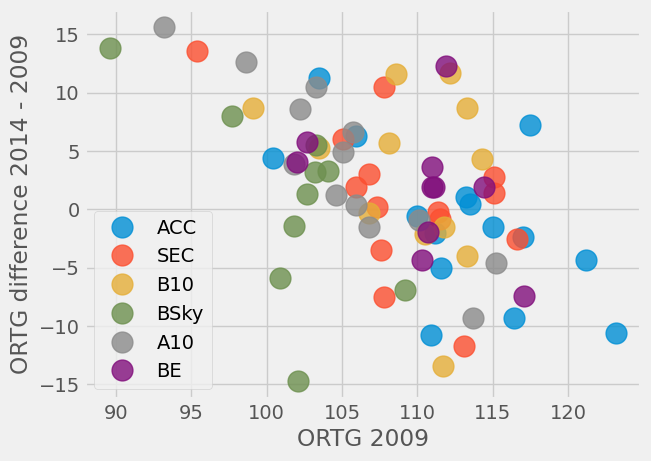

In [ ]:
def sort_conference(data):
    """ 
    Function to sort the data by conference
    """
    ACC = data[data[:,1] == "ACC"]
    SEC = data[data[:,1] == "SEC"]
    B10 = data[data[:,1] == "B10"]
    BSky = data[data[:,1] == "BSky"]
    A10 = data[data[:,1] == "A10"]
    BE = data[data[:,1] == "BE"]
    all_conferences = [ACC, SEC, B10, BSky, A10, BE]
    return all_conferences

conferences_2014 = sort_conference(data_numpy_2014)
ACC_2014 = conferences_2014[0]


for conference in conferences_2014:
    result = np.array(compare_values(conference, data_numpy_2009, 5), dtype = object).T
    plt.plot(result[2], result[3], 'o', markersize = 15, alpha = 0.8,  label = conference[0,1])

plt.legend()
plt.xlabel('ORTG 2009')
plt.ylabel('ORTG difference 2014 - 2009')


# Extra Exercise

In [9]:
from pypdf import PdfReader

Document = PdfReader("Many names.pdf")
final_text = ""
for page in Document.pages:
    final_text += page.extract_text()

In [37]:
alphabet = [x + "." for x in list("ABCDEFGHIJKLMNOPQRSTUVWXYZ")]
test_text = Document.pages[0].extract_text()
start_indx = 173
test_text = test_text[start_indx:start_indx+1000]
print(test_text)

current_string = final_text[start_indx:]
search_length = 50
print("")
print("number of letters", len(current_string))

names_list = []
i = 0
max_i = len(current_string)
while i < 1000000:
    name_end_indx = current_string.index(",")
    name = current_string[:name_end_indx]
    interval = current_string[name_end_indx: name_end_indx + search_length]
    found_letters_indx = []
    for x in alphabet:
        if x in interval:
            found_letters_indx.append(interval.index(x))
    
    if len(found_letters_indx) == 0:
        print(name)
        break

    end_indx = min(found_letters_indx)

    affiliation = interval[:end_indx]
    current_string = current_string[name_end_indx + end_indx:]
    names_list.append(name)

    


    i += 1

#print(names_list[-1])
print(len(names_list))

B. P. A BBOTT ,1 R. A BBOTT ,1 T. D. A BBOTT ,2 F. ACERNESE ,3, 4 K. ACKLEY ,5, 6 C. A DAMS ,7 T. ADAMS ,8 P. ADDESSO ,9
R. X. A DHIKARI ,1 V. B. ADYA,10 C. A FFELDT ,10 M. A FROUGH ,11 B. AGARWAL ,12 M. AGATHOS ,13 K. AGATSUMA ,14
N. AGGARWAL ,15 O. D. A GUIAR ,16 L. A IELLO ,17, 18 A. A IN,19 P. AJITH ,20 B. A LLEN ,10, 21, 22 G. A LLEN ,12 A. A LLOCCA ,23, 24
P. A. A LTIN ,25 A. A MATO,26 A. A NANYEVA ,1 S. B. A NDERSON ,1 W. G. A NDERSON ,21 S. V. ANGELOVA ,27 S. A NTIER ,28 S. A PPERT ,1
K. A RAI ,1 M. C. A RAYA,1 J. S. A REEDA ,29 N. A RNAUD ,28, 30 K. G. A RUN ,31 S. A SCENZI ,32, 33 G. A SHTON ,10 M. A ST,34
S. M. A STON ,7 P. ASTONE ,35 D. V. ATALLAH ,36 P. AUFMUTH ,22 C. AULBERT ,10 K. AULTONEAL ,37 C. AUSTIN ,2
A. AVILA -ALVAREZ ,29 S. BABAK ,38 P. BACON ,39 M. K. M. B ADER ,14 S. BAE,40 P. T. BAKER ,41 F. BALDACCINI ,42, 43
G. BALLARDIN ,30 S. W. B ALLMER ,44 S. BANAGIRI ,45 J. C. B ARAYOGA ,1 S. E. B ARCLAY ,46 B. C. B ARISH ,1 D. BARKER ,47
K. BARKETT ,48 F. BARONE ,3, 4 